In [31]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values


c:\Users\ultim\anaconda3\envs\IDM\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


array(['CONTROL', '# CHEQUE', 'PARTIDA PRESUPUESTAL', 'UIDD/FOLIO FISCAL',
       'DIRECCION', 'REGIMEN FISCAL', 'NOMBRE REGIMEN FISCAL', 'RFC',
       'STATUS', 'FECHA DE RECIBIDO', 'SEMANA QUE SE PAGA', 'TIPO',
       'NOMBRE DEL PROVEEDOR', 'CORREO', 'CONCEPTO', 'TIPO2', 'SUBTOTAL',
       'IVA', 'OTROS IMPUESTOS', 'RET IVA', 'RET ISR', 'TOTAL',
       'CUENTA CLAVE', 'BANCO', 'ESTATUS', 'FECHA DE PAGO ', 'NOTAS',
       'Valida', 'MES', 'Column1', 'SUBTOTAL2', 'IVA3', 'RET IVA4',
       'RET ISR.1', 'TOTAL.1', 'CAMBIOS', 'Unnamed: 36'], dtype=object)

In [38]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_numeros = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO "], how='all')


# Asegurar que los datos numéricos estén en el formato correcto
df_numeros = df_numeros[pd.to_numeric(df_numeros['FECHA DE PAGO '], errors='coerce').notna()]
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]

df_numeros = df_numeros.dropna(subset=['TOTAL'])
#display(df_detalle)
display(df_numeros)

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
0,NaN,NaN,Income (Funding),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Income (Funding) IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F1.2,NaN,Income (Funding),NaN,NaN,Estados Unidos (los),Estados Unidos (los),0.0,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.0,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.0
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.0,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,T13,-,Impuestos Pagados (IVA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6763,T13.1,-,Impuestos Pagados (ISR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7337,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7338,NaN,NaN,DEV IVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Balance,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Resumen general
print(df_numeros.describe())
df_numeros = df_numeros.dropna(subset=['Valida'])

# Departamentos únicos
len(df_numeros["Valida"].unique())

#len(df_limpio["Valida"].unique())

       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        6227.000000  5736.000000         986.000000   
mean         2104.588566   280.491806         247.739422   
std          1306.242589   282.871756          72.586939   
min             0.000000     0.000000        -190.000000   
25%           783.500000    41.000000         204.498264   
50%          2054.000000   173.000000         261.164387   
75%          3250.500000   454.000000         283.508322   
max          4611.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           6364.000000  6034.000000  6367.000000  6.373000e+03   
mean             484.577938    37.382665  2053.092351  4.750792e+04   
std              404.228577    60.422614  1246.332211  7.312277e+05   
min                0.000000     0.000000     0.000000 -5.674003e+05   
25%              150.000000     1.000000   977.500000  5.163800e+02   
50%              343.000000    17

1033

In [56]:
# Crear la nueva columna tomando solo la parte antes del guion
df_numeros['Cuentasb'] = df_numeros['Valida'].str.split('-').str[0]
df_numeros['Cuentasd2'] = df_numeros['Valida'].str[:2].apply(lambda x: f'00{x}')
print(len(df_numeros["Cuentasd2"].unique()))
print(df_numeros["Valida"].isna().sum())
print(df_numeros['Cuentasb'])

35
0
0       Balance
1       Balance
2       Balance
3          7007
4          1107
         ...   
6762    Balance
6763    Balance
7337    Balance
7338    Balance
7339    Balance
Name: Cuentasb, Length: 6373, dtype: object


In [61]:
departamentos = list(df_numeros["Cuentasd2"].unique())
departamentos.remove("Bala")



for i in departamentos:
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    plt.bar(semanas,coso,label=i)
    #print(coso)
plt.legend()

plt.show()

ValueError: list.remove(x): x not in list

In [52]:
sumas=[]
for i in departamentos:
    e = sum(list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL']))
    sumas.append(e)
pie=pd.DataFrame({'sumas':sumas,'departamentos':departamentos})
pie.sort_values(by="sumas")

,sumas,departamentos
33,4.060000e+04,54
28,3.468400e+05,35
29,3.695371e+05,29
31,4.735120e+05,33
24,7.213565e+05,38
6,1.003449e+06,16
20,1.037126e+06,23
30,1.040078e+06,37
13,1.161962e+06,25
16,1.213308e+06,28


([<matplotlib.patches.Wedge at 0x25158f40590>,
 [Text(1.0827239967038345, 0.19418740165539852, '70'),
  Text(0.9139801591514899, 0.6120786458270028, '11'),
  Text(0.6018179598892457, 0.9207687783340324, '20'),
  Text(0.1117430138430839, 1.094309599179896, '34'),
  Text(-0.45634298491743386, 1.0008751571083414, '12'),
  Text(-0.6995518422938788, 0.848897649863186, '22'),
  Text(-0.7535063960587368, 0.8013913595108038, '16'),
  Text(-0.8259439879140561, 0.7265098270695487, '27'),
  Text(-0.9018448986404054, 0.6298220215237612, '72'),
  Text(-1.0032548466842601, 0.4510872560874911, '39'),
  Text(-1.0961578908480782, 0.09185792470708587, '36'),
  Text(-1.0691712365860335, -0.2585978864126547, '24'),
  Text(-0.8378831122644387, -0.7127074365979762, '14'),
  Text(-0.5282472824000622, -0.9648599943188385, '25'),
  Text(-0.2028819463369008, -1.0811285380797933, '31'),
  Text(0.24866989713697626, -1.0715238132015013, '50'),
  Text(0.4084991226452416, -1.0213366079790092, '28'),
  Text(0.4937505

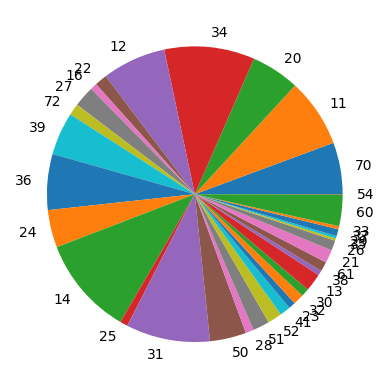

In [54]:
fig, ax = plt.subplots()
ax.pie(pie['sumas'], labels=pie['departamentos'])

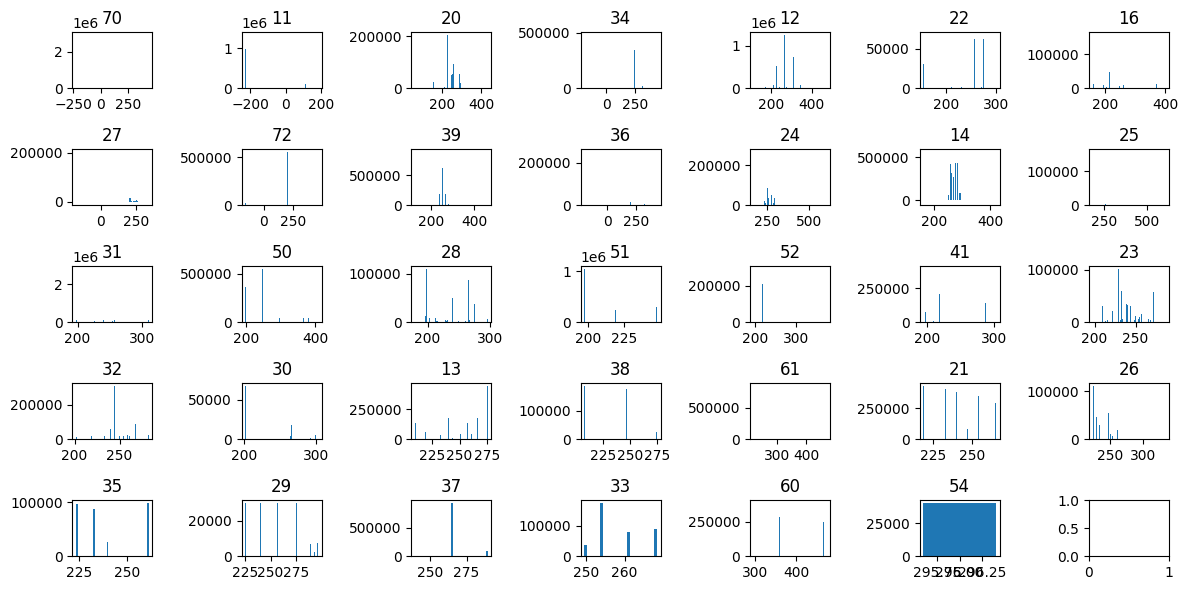

In [48]:
fig, axes = plt.subplots(5, 7, figsize=(12, 6))  # Crear figura con subgráficos


for ax, i in zip(axes.flat, departamentos):
    #otra.loc[otra["UNIDAD ESP."] == i, 'GASTO']
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    ax.bar(semanas,coso,label=i)
    ax.set_title(i)  # Opcional: título con el nombre del departamento

plt.tight_layout()  # Ajusta los gráficos para evitar superposición
plt.show()